In [ ]:
!pip install kaggle

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 88% 143M/163M [00:00<00:00, 242MB/s]
100% 163M/163M [00:00<00:00, 240MB/s]


In [ ]:
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
from google.colab.patches import cv2_imshow
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import img_to_array, load_img
import os

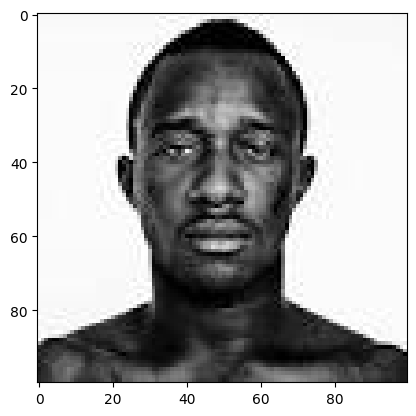

In [ ]:
img1 = cv2.imread('/content/data/without_mask/without_mask_1.jpg')
plt.imshow(img1)
plt.show()

In [ ]:
# Parameters
IMG_SIZE = (128, 128)  # You can adjust the image size
BATCH_SIZE = 32

# Function to load images and labels
def load_images_from_folder(folder, label):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = load_img(img_path, target_size=(128,128,3))
        img_array = img_to_array(img)
        images.append(img_array)
        labels.append(label)
    return images, labels

In [ ]:
# Load images and labels
with_mask_images, with_mask_labels = load_images_from_folder('/content/data/with_mask', 1)
without_mask_images, without_mask_labels = load_images_from_folder('/content/data/without_mask', 0)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
# Combine and convert to numpy arrays
X = np.array(with_mask_images + without_mask_images)
y = np.array(with_mask_labels + without_mask_labels)

In [ ]:
X_std = X/255.0

In [ ]:
# Split the data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.25, random_state=42)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 63, 63, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 30, 30, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 14, 14, 128)      

In [ ]:
hist = model.fit(X_train, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
142/142 [==============================] - 5s 26ms/step - loss: 0.4315 - accuracy: 0.8040 - val_loss: 0.3365 - val_accuracy: 0.8667
Epoch 2/10
142/142 [==============================] - 3s 24ms/step - loss: 0.2620 - accuracy: 0.8943 - val_loss: 0.2251 - val_accuracy: 0.9144
Epoch 3/10
142/142 [==============================] - 3s 22ms/step - loss: 0.2254 - accuracy: 0.9113 - val_loss: 0.2242 - val_accuracy: 0.9117
Epoch 4/10
142/142 [==============================] - 3s 21ms/step - loss: 0.1879 - accuracy: 0.9232 - val_loss: 0.2550 - val_accuracy: 0.8994
Epoch 5/10
142/142 [==============================] - 3s 21ms/step - loss: 0.1726 - accuracy: 0.9345 - val_loss: 0.1809 - val_accuracy: 0.9356
Epoch 6/10
142/142 [==============================] - 3s 23ms/step - loss: 0.1463 - accuracy: 0.9490 - val_loss: 0.1829 - val_accuracy: 0.9338
Epoch 7/10
142/142 [==============================] - 3s 23ms/step - loss: 0.1048 - accuracy: 0.9618 - val_loss: 0.1893 - val_accuracy: 0.9356

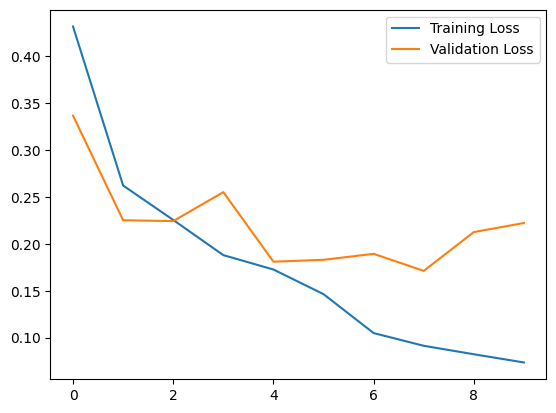

In [ ]:
plt.plot(hist.history['loss'], label="Training Loss")
plt.plot(hist.history['val_loss'], label="Validation Loss")
plt.legend()
plt.show()

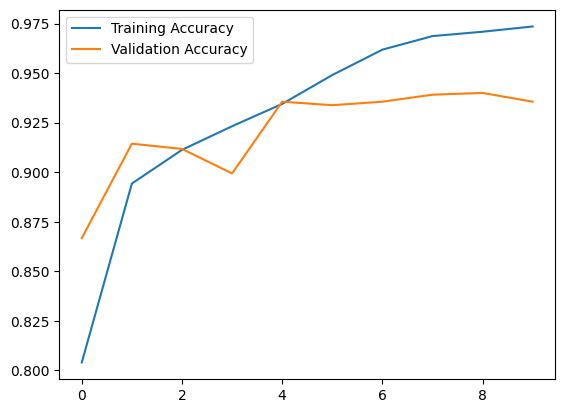

In [ ]:
plt.plot(hist.history['accuracy'], label="Training Accuracy")
plt.plot(hist.history['val_accuracy'], label="Validation Accuracy")
plt.legend()
plt.show()

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)

60/60 [==============================] - 1s 9ms/step - loss: 0.1600 - accuracy: 0.9576


In [ ]:
print(accuracy)

0.9576495289802551


In [ ]:
import pickle

# save the iris classification model as a pickle file
model_pkl_file = "face_mast_detetion_model.pkl"

with open(model_pkl_file, 'wb') as file:
    pickle.dump(model, file)

In [ ]:
# load model from pickle file
with open(model_pkl_file, 'rb') as file:
    model = pickle.load(file)

In [ ]:
y_pred_prob = model.predict(X_test)

60/60 [==============================] - 1s 7ms/step


In [ ]:
y_pred_prob

array([[2.8250057e-07, 9.9999976e-01],
       [1.2943126e-06, 9.9999869e-01],
       [9.0177309e-05, 9.9990976e-01],
       ...,
       [9.9583375e-01, 4.1662203e-03],
       [1.5806359e-05, 9.9998415e-01],
       [9.7965127e-01, 2.0348756e-02]], dtype=float32)

In [ ]:
y_pred = [np.argmax(i) for i in y_pred_prob]

In [ ]:
from sklearn.metrics import precision_score, recall_score

precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print("Precision: ", precision)
print("Recall: ", recall)

Precision:  0.9578515574659576
Recall:  0.957649550026469


In [ ]:
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import cv2
import numpy as np
import PIL
import io
import html
import time

In [ ]:
# function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img

# function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes

In [ ]:
# JavaScript to properly create our live video stream using our webcam as input
def video_stream():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;

    var pendingResolve = null;
    var shutdown = false;

    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }

    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }

    async function createDom() {
      if (div !== null) {
        return stream;
      }

      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);

      const modelOut = document.createElement('div');
      modelOut.innerHTML = "<span>Status:</span>";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      labelElement.style.fontWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);

      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);

      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);

      const instruction = document.createElement('div');
      instruction.innerHTML =
          '<span style="color: red; font-weight: bold;">' +
          'When finished, click here or on the video to stop this demo</span>';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };

      video.srcObject = stream;
      await video.play();

      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 640; //video.videoWidth;
      captureCanvas.height = 480; //video.videoHeight;
      window.requestAnimationFrame(onAnimationFrame);

      return stream;
    }
    async function stream_frame(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }

      var preCreate = Date.now();
      stream = await createDom();

      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }

      if (imgData != "") {
        var videoRect = video.getClientRects()[0];
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }

      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;

      return {'create': preShow - preCreate,
              'show': preCapture - preShow,
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)

def video_frame(label, bbox):
  data = eval_js('stream_frame("{}", "{}")'.format(label, bbox))
  return data

In [ ]:
# Start streaming video from webcam
video_stream()

# Label for video
label_html = 'Capturing...'

# Initialize bounding box to empty
bbox = ''
count = 0

while True:
    js_reply = video_frame(label_html, bbox)
    if not js_reply:
        break

    # Convert JS response to OpenCV Image
    img = js_to_image(js_reply["img"])

    # Create transparent overlay for bounding box
    bbox_array = np.zeros([480, 640, 4], dtype=np.uint8)

    # Resize image for model prediction
    resized = cv2.resize(img, (128, 128), interpolation=cv2.INTER_AREA)

    # Normalize the image
    normalized = resized / 255.0

    # Reshape the image to fit the model input
    reshaped = np.reshape(normalized, (1, 128, 128, 3))

    # Make predictions
    predictions = model.predict(reshaped)
    predicted_class = (predictions > 0.5).astype("int32")

    # Get prediction label
    label = 'Mask' if predicted_class[0][0] == 1 else 'No Mask'

    # Add prediction text to bounding box array
    bbox_array = cv2.putText(bbox_array, label, (10, 30),
                             cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)

    # Convert the overlay of bbox into bytes
    bbox_array[:, :, 3] = (bbox_array.max(axis=2) > 0).astype(int) * 255
    bbox_bytes = bbox_to_bytes(bbox_array)

    # Update bbox so the next frame gets a new overlay
    bbox = bbox_bytes

    # Press 'q' to exit the loop (uncomment if running in an interactive environment)
    # if cv2.waitKey(1) & 0xFF == ord('q'):
    #     break

<IPython.core.display.Javascript object>

1/1 [==============================] - 0s 19ms/step
